## Nenegativna matrična faktorizacija in priporočilni sistemi

Do sedaj smo obravnavali modele, ki so iz <i>več neodvisnih</i> napovedovali <i>eno</i> odvisno spremenljivko. V scenariju priporočilnega sistema smo tako za vsakega uporabnika zgradili svoj model.

Glavna motivacija metod za priporočilne sisteme je, da modeli uporabnikov med sabo <i>niso neodvisni</i>. Želimo enoten model, ki bo ovrednotil poljubno kombinacijo uporabnika in izdelka, ter implicinto izkoriščal medsebojno informacijo med različnimi modeli uporabnikov. 

Eden od modelov, ki se zelo pogosto uporabljajo v praksi je model matrične faktorizacija.
Ta predpostavlja matriko uporabnikov in izdelkov, ki ji predstavimo kot produkt dveh matrik <i>nižjega ranga</i>. Slednja lastnost omogoča stiskanje informacije in sklepanje o novih (ne-videnih, manjkajočih vrednosti) v izvirni matriki.

<img width=450 src="img/nmf-shema-01.png"/>

### Uvodne definicije

Matriko podatkov $\mathbf{X}$, ki vsebuje manjkajoče vrednosti, z modelom matrične faktorizacije predstavimo na naslednji način:
$$ \mathbf{X} = \mathbf{W} \mathbf{H}^T + \mathbf{E} $$,

torej kot produkt matrike $\mathbf{W}$, ki predstavlja prostor vrstic, $\mathbf{H}$ predstavlja prostor stolpcev, $\mathbf{E}$ pa ostanek oz. napako. Matriki $\mathbf{W}, \mathbf{H}$ si včasih predstavljamo kot hkratno gručenje stolpcev in vrstic. Matrike so naslednjih velikosti:
$$ \mathbf{X} \in \mathbb{R}^{m \times n}, \mathbf{W} \in \mathbb{R}^{m \times r}, \mathbf{H} \in \mathbb{R}^{n \times r},  \mathbf{E} \in \mathbb{R}^{m \times n}$$

Predostavljamo, da sta matriki $\mathbf{W}, \mathbf{H}$ <i>nizkega ranga</i>, kar v praksi pomeni da celotno informacijo iz $\mathbf{X}$ predstavljamo v stisnjeni obliki, torej
$$r < m, r < n $$.

Predpostavljamo tudi, da so matrike $\mathbf{X}$, $\mathbf{W}$ in $\mathbf{H}$ nenegativne. Tedaj govorimo o <b>nenegativni matrični faktorizaciji (NMF)</b>.
$$x_{i, j} > 0, w_{i, k} > 0, h_{j, k} > 0, \forall i, j, k $$.

Matrika napake $\mathbf{E}$ te omejitve nima (<font color="blue">razmisli</font>: zakaj?).

<br/>
### Definicija problema

Želimo torej poiskati matriki $\mathbf{W}$ in $\mathbf{H}$, tako da vrednost napake karseda nizka. To lahko zapišemo kot naslednji optimizacijski problem:

$$ \text{min}_{\mathbf{W},\mathbf{H}}\ \| \mathbf{X} - \mathbf{W}\mathbf{H}^T \|_F^2 = \text{min}_{\mathbf{W},\mathbf{H}}\ J$$

Oznaka $\| \mathbf{A} \|_F = \sqrt{\sum_{i,j} a_{i,j}^2}$ predstavlja <i>Frobeniusovo normo</i> matrike $\mathbf{A}$.  (<font color="blue">razmisli</font>: Opaziš podobnost s srednjo kvadratično napako, ki smo jo spoznali v kontekstu linearne regresije?)


Vrednost $J$ imenujemo <i>kriterijska funkcija</i>, problem iskanja minimuma pa <i>optimizacijski oz. minimizacijski problem</i>.  <b>Posebnost</b> priporičilnih sistemov je ta, da napako računamo samo na vrednostih v $\mathbf{X}$, ki so znane. Kriterijska funkcija je torej:

$$ J = \sum_{i, j | x_{i,j} \not = 0} (x_{i, j} - \sum_{l=1}^{r} w_{i,l}h_{j, l} )^2 $$

Za ta konkreten problem velja, da nima globalno optimalne rešitve za spremenljivke $\mathbf{W},\mathbf{H}$.  Vseeno ga lahko rešimo npr. z odvajanjem kriterijske funkcije in premikanjem v negativni smeri gradienta. Dobimo 
<i>pravila za posodabljanje</i> vrednosti v $\mathbf{W},\mathbf{H}$:

Vse vrednosti $w_{i,k}$ in $h_{j, k}$ popravimo tako, da vrednost v prejšnji iteraciji <i>popravimo</i> v negativni smeri gradienta, s <i>korakom</i> $\eta$:

$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} = w_{i, k}^{(t)} + \eta \sum_{j \ | \ x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(w_{i, k}^{(t)})$$

$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} = h_{j, k}^{(t)} + \eta \sum_{i \ | \  x_{i,j} \not = 0} (x_{i,j} - \sum_{l=1}^r w_{i,l} h_{j, l})(h_{j, k}^{(t)})$$

<font color="green"><b>Pravila izpeljemo na tablo.</b></font>


<br/>
### Stohastični gradientni sestop

Stohastični gradientni sestop (SGD) je postopek za reševanje optimizcijskih problemov, ki niso globalno rešljivi, za vse nastopajoče spremenljivke (v našem primeru vse $w_{i,k}$ in $h_{j, k}$) pa znamo izračunati odvod glede na kriterijsko funkcijo. To smo storili v prešnjem delu.
Postopek za iskanje <i>lokalnega minimuma</i> je naslednji.

1. Naključno nastavi vrednosti vseh spremenljivk  $w_{i,k}$ in $h_{j, k}$. V našem primeru 
    velja $w_{i,k} > 0$  in $h_{j, k} > 0$.
2. V iteraciji $t = 1...T$:
    
    2.1 V naključnem vrstnem redu posodabljaj $\forall i, k, j$
$$ w_{i,k}^{(t+1)}  = w_{i, k}^{(t)} - \eta \frac{\delta J}{\delta w_{i,k}} $$
$$ h_{j, k}^{(t+1)}  = h_{j, k}^{(t)} - \eta \frac{\delta J}{\delta h_{j, k}} $$
            
<img width=450 src="gradient-descent-1.png"/>
Shematski prikaz gradientnega sestopa za hipotetični spremenljivki $w$, $h$ in kriterijsko funkcijo $J(w, h)$.


<font color="green"><b>Naredi sam/a.</b></font> Dopolni spodnjo implementacijo algoritma NMF, tako da uporabiš posodobitvena pravila v več iteracijah stohastičnega gradientnega sestopa. 
<br/>
<font color="blue"><b>Namig.</b></font> Pri računanju gradienta upoštevaj samo vrednosti $x_{i, j}$, ki so znane (različne od 0). Za učinkovito implementacijo izračuna vsot $\sum_{i \ | \  x_{i,j} \not = 0} $ in $\sum_{j \ | \  x_{i,j} \not = 0} $ najprej (pred začetkom iteracij):
* za vsako vrstico $i$ shranimo neničelne stolpce
* za vsak stolpec $j$ shranimo neničelne vrstice

In [8]:
from nmf import NMF
import numpy as np

Testirajmo metodo na matriki naključnih podatkov.

In [9]:
m = 100       # St. vrstic
n = 80        # St. stolpcev
rank = 5      # Rang model
error = 0.1   # Nakljucni šum
A = np.random.rand(m, rank*2)  
B = np.random.rand(n, rank*2)
X = A.dot(B.T) + error * np.random.rand(m, n)  # generiramo podatke

Poženemo iskanje parametrov $\mathbf{W}$, $\mathbf{H}$.

In [5]:
model = NMF(rank=rank, max_iter=20, eta=0.001)
model.fit(X)

Iteracija 0 napaka 14043.6011383
Iteracija 1 napaka 8829.79930023
Iteracija 2 napaka 5297.70631209
Iteracija 3 napaka 3169.2247329
Iteracija 4 napaka 1987.17424429
Iteracija 5 napaka 1357.83558615
Iteracija 6 napaka 1025.33107622
Iteracija 7 napaka 846.69600702
Iteracija 8 napaka 747.73236415
Iteracija 9 napaka 690.80533481
Iteracija 10 napaka 656.66414221
Iteracija 11 napaka 635.219272199
Iteracija 12 napaka 621.027396402
Iteracija 13 napaka 611.071653352
Iteracija 14 napaka 603.642406689
Iteracija 15 napaka 597.753796093
Iteracija 16 napaka 592.829493756
Iteracija 17 napaka 588.528707025
Iteracija 18 napaka 584.647745977
Iteracija 19 napaka 581.063450128


Napaka modela pada s številom iteracij.

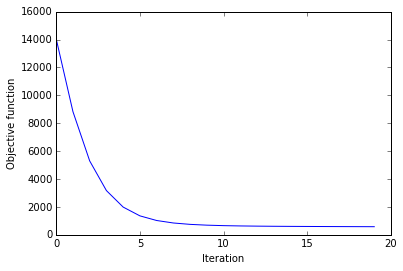

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.error)
plt.xlabel("Iteration")
plt.ylabel("Objective function")

Primerjajmo model in izvirne podatke.

/Users/martin/Dev/py3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


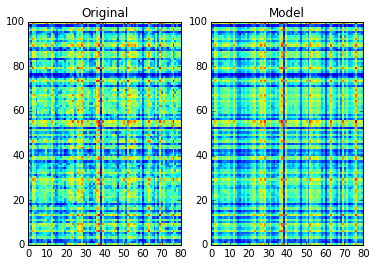

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolor(X)
ax[0].set_title("Original")

ax[1].pcolor(model.predict_all())
ax[1].set_title("Model")
plt.show()

Izračunamo pojasnjeno varianco.

In [50]:
Xp = model.predict_all()
expl_var = (np.var(X) - np.var(X-Xp))/np.var(X)
expl_var

0.48802714258170715